# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Filtrage bases de prod
- Label = infox
- base labelizer : prédiction infox > 0.8

---

## Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd

### Chargement des données

In [4]:
import patat.db.label_db
label_db = patat.db.label_db.LabelDb()
label_db.df()

,url,value,label,owner,url_h,type
0,https://reseauinternational.net/tous-les-jeune...,0.049183,infox,221013-InfoxPred,f95a294c94ff76cc9626ae06300a8b38067f89cf,pred
1,https://reseauinternational.net/adhesion-a-la-...,0.022365,infox,221013-InfoxPred,c924dab7ded47578d81c3ae46f8be0964b3c50f1,pred
2,https://lemediaen442.fr/onu-le-premier-ministr...,0.967536,infox,221013-InfoxPred,3d47a59ef99274fd9ee96c209cc2ab41d6e1f6bb,pred
3,https://www.francesoir.fr/societe-environnemen...,0.254574,infox,221013-InfoxPred,0c0341a1f5fae820ee307cb54024df6b06a93d85,pred
4,https://www.breizh-info.com/2022/09/27/208410/...,0.074594,infox,221013-InfoxPred,fcce819327d0302c4cf5e3a8a43b54327ffb8e63,pred
...,...,...,...,...,...,...
186181,https://www.profession-gendarme.com/zelensky-e...,0.556761,infox,220930-tf_lr.pp,e346761c2a99d892b26c9388480e0ee6ad6b303b,pred
186182,https://www.profession-gendarme.com/zelensky-l...,0.164531,infox,220930-tf_lr.pp,77525354644316eadab53960efa8f5fd028c7f67,pred
186183,https://www.profession-gendarme.com/zelensky-m...,0.673791,infox,220930-tf_lr.pp,fc6a074da5c02032bc9fc3f35f1044bc4029042c,pred
186184,https://www.profession-gendarme.com/zero-mort-...,0.103192,infox,220930-tf_lr.pp,e4f0a8961d79c9a5f66c80d7aa4196cb679af2b0,pred


## Expérience
---

### Etape 1

In [6]:
df_label = label_db.df()
df_label = df_label[df_label['label']=='infox']

In [7]:
df_label.to_csv('data/prod/221014-LabelInfox.csv')

In [21]:
df = df_label[(df_label['owner']=='221013-InfoxPred') & (df_label['value']>0.8)]

In [25]:
import random

In [38]:
n = random.randrange(len(df))
df.iloc[n]['url_h']


'e88a1ff8d071205cf3e68c6fa6797ed53f33edc3'

In [8]:
df_pred = df_label[df_label['type']=='pred']

In [11]:
df_graph = df_pred.pivot_table(index='url',values='value',columns='owner')

In [16]:
df_graph.keys()

Index(['220930-tf_lr.pp', '221013-InfoxPred'], dtype='object', name='owner')

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='220930-tf_lr.pp', ylabel='221013-InfoxPred'>

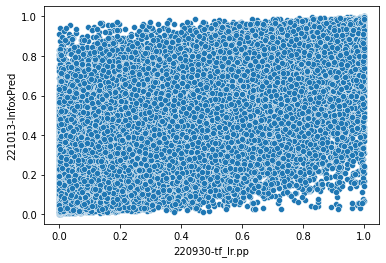

In [20]:
sns.scatterplot(data=df_graph,x='220930-tf_lr.pp',y='221013-InfoxPred')

## Mesure et observation des résultats
---

## Sauvegarde des résultats
---

## Conclusions
---

- Résultat : OK

## Bricolages
---